In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

#參考文章：https://www.kaggle.com/nishimoto/very-simple-linear-models-pls

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
testID = test['building_id']

#data = pd.concat([train.drop('SalePrice', axis=1), test], keys=['train', 'test'])
#data.drop(['Id'], axis=1, inplace=True)
#df_all = pd.concat([train.drop('SalePrice', axis=1), test], keys=['train', 'test'])
#df_all.drop(['Id'], axis=1, inplace=True)

In [4]:
print(f"train shape : {train.shape}")
print(f" test shape : {test.shape}")

train shape : (60000, 235)
 test shape : (10000, 234)


In [5]:
#瞭解資料型別
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 235 entries, building_id to total_price
dtypes: float64(37), int64(197), object(1)
memory usage: 107.6+ MB


In [6]:
#train.corr('kendall')

In [7]:
# 描述data物件型態的統計資訊（個數、種類、出現頻率最高的種類及其次數）
print(f"categorical features: {train.describe(include='O').shape}")
# 查詢非數值資訊
train.describe(include="O")

categorical features: (4, 1)


,building_id
count,60000
unique,60000
top,QIA5BXhswvJpRGq0
freq,1


In [8]:
# 瞭解資料的分佈情況
train.describe()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,...,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,3103.000000,1.393500e+04,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.0,60000.000000,6.000000e+04
mean,7.267917,11.414533,19488.957917,7.638250,1.931817,2.319200,11050.437183,1.585700,7.211837,5.025058e+04,...,60.867700,0.995800,252.823100,0.999867,5276.668033,1.0,16474.836600,1.0,101.044751,1.293727e+07
std,2.170741,4.751677,727.331019,5.070314,1.589972,1.399528,4344.018090,0.778952,20.453902,3.973488e+04,...,88.512972,0.064672,322.694074,0.011546,3856.219059,0.0,8998.020659,0.0,80.216061,5.522463e+07
min,1.000000,3.000000,18112.000000,1.000000,0.000000,0.000000,123.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,19.000000,1.0,30.000000,1.0,0.064766,2.261495e+05
25%,8.000000,7.000000,18892.750000,4.000000,0.000000,2.000000,7186.000000,2.000000,3.738412,2.827238e+04,...,20.000000,1.000000,88.000000,1.000000,2672.000000,1.0,8859.000000,1.0,49.182384,2.433114e+06
50%,8.000000,12.000000,19527.000000,5.000000,1.000000,2.000000,11507.000000,2.000000,5.758023,4.379195e+04,...,36.000000,1.000000,154.000000,1.000000,3942.000000,1.0,14344.000000,1.0,83.216237,5.240482e+06
75%,8.000000,13.000000,20125.000000,12.000000,4.000000,2.000000,14519.000000,2.000000,7.180619,6.148857e+04,...,64.000000,1.000000,275.000000,1.000000,6647.000000,1.0,23459.250000,1.0,130.779416,1.123932e+07
max,11.000000,21.000000,20665.000000,29.000000,4.000000,10.000000,20577.000000,2.000000,967.370868,1.020404e+06,...,1681.000000,1.000000,3463.000000,1.000000,18268.000000,1.0,32908.000000,1.0,1106.382478,5.088279e+09


In [9]:
#train.max(axis = 0) 

## EDA (Drop Outlier)

In [10]:
# 描述data數值型態的統計資訊（個數、平均、標準差、最小值、
#                           第一四分位數、第二四分位數、第三四分位數
#                           、最大值）
#print(f"numerical feature: {train['Utilities'].describe().shape}")
      


In [11]:
## EDA (Drop Outlier)

In [12]:
# drop掉離群值
#https://www.kaggle.com/agehsbarg/top-10-0-10943-stacking-mice-and-brutal-force

print( train[(train['total_price']>500000000) ].total_price )

2088     7.438093e+08
2138     4.357039e+09
2317     3.378167e+09
5672     1.145063e+09
8340     8.386713e+08
9491     2.038068e+09
11066    5.198605e+08
11262    1.190981e+09
11327    1.065516e+09
12693    1.783530e+09
12700    6.528219e+08
13096    7.206928e+08
13592    7.115146e+08
14009    6.751965e+08
14944    6.307002e+08
16817    5.658819e+08
16846    7.907659e+08
17899    7.577955e+08
19035    1.083906e+09
21239    5.658819e+08
22447    7.280174e+08
23135    6.978210e+08
23374    1.226498e+09
23716    6.528219e+08
24635    1.039427e+09
24667    7.789370e+08
25263    5.075368e+08
25536    1.309777e+09
26627    1.172001e+09
27497    1.783530e+09
             ...     
37480    1.973377e+09
39024    1.118336e+09
39191    1.909385e+09
41331    1.613896e+09
41914    9.372557e+08
42961    1.078641e+09
43646    6.978210e+08
45316    1.091819e+09
45607    7.839925e+08
45951    1.091819e+09
46934    2.169519e+09
47172    1.400595e+09
48767    1.423615e+09
49179    8.875563e+08
50076    2

In [13]:
#print( train[(train['total_price']<1000000) ].total_price )

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


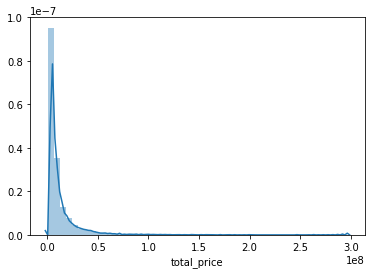

In [14]:
#價錢的分佈
#價錢的分佈
sns.distplot(train[(train['total_price']<300000000)].total_price )

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


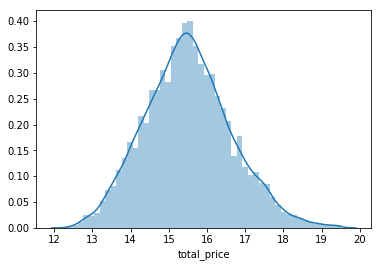

In [15]:
# 一些右偏分佈的 feature，可透過取 log 將其轉為常態分佈
sns.distplot(np.log(train[(train['total_price']<300000000)].total_price))

In [16]:
train = train.drop( labels = train[  (train['total_price']>300000000) ].index, axis = 0 )

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


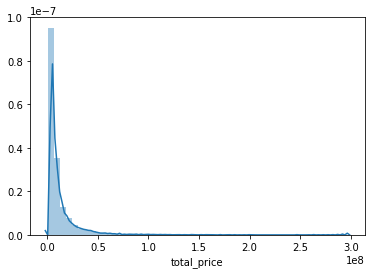

In [17]:
#價錢的分佈
sns.distplot(train.total_price)

In [18]:
train.describe()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,...,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price
count,59847.000000,59847.000000,59847.000000,59847.000000,59847.000000,59847.000000,59847.000000,59847.000000,3085.000000,1.384600e+04,...,59847.000000,59847.000000,59847.000000,59847.000000,59847.000000,59847.0,59847.000000,59847.0,59847.000000,5.984700e+04
mean,7.265744,11.412669,19489.376978,7.634351,1.932461,2.317526,11042.889986,1.587598,6.924312,4.937139e+04,...,60.858740,0.995789,252.914432,0.999866,5277.282320,1.0,16468.340936,1.0,100.982139,1.103881e+07
std,2.170534,4.755442,727.369160,5.066581,1.589276,1.396659,4339.281581,0.777449,18.225413,3.793973e+04,...,88.466835,0.064754,322.831190,0.011561,3857.038739,0.0,9001.966762,0.0,80.172003,2.018355e+07
min,1.000000,3.000000,18112.000000,1.000000,0.000000,0.000000,123.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,19.000000,1.0,30.000000,1.0,0.064766,2.261495e+05
25%,8.000000,7.000000,18893.000000,4.000000,0.000000,2.000000,7186.000000,2.000000,3.738412,2.827238e+04,...,20.000000,1.000000,88.000000,1.000000,2671.000000,1.0,8849.500000,1.0,49.180358,2.432763e+06
50%,8.000000,12.000000,19528.000000,5.000000,1.000000,2.000000,11507.000000,2.000000,5.758023,4.379195e+04,...,36.000000,1.000000,154.000000,1.000000,3943.000000,1.0,14334.000000,1.0,83.190655,5.240482e+06
75%,8.000000,13.000000,20125.000000,12.000000,4.000000,2.000000,14460.000000,2.000000,7.180619,6.148857e+04,...,64.000000,1.000000,275.000000,1.000000,6649.000000,1.0,23460.000000,1.0,130.698101,1.106841e+07
max,11.000000,21.000000,20665.000000,29.000000,4.000000,10.000000,20577.000000,2.000000,967.370868,1.020404e+06,...,1681.000000,1.000000,3463.000000,1.000000,18268.000000,1.0,32908.000000,1.0,1106.382478,2.966421e+08


Text(0,0.5,'total_price')

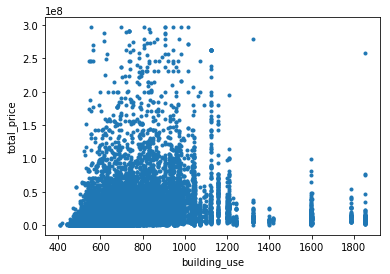

In [19]:
#價錢的分佈
#building_complete_dt>=1600
#parking_price >800000
#building_area>800
#parking_area>800
#land_area >=3000
#town_population remove
#village_income_median remove
#town_area remove

plt.plot(train.village_income_median, train.total_price, '.' )
plt.xlabel('building_use')
plt.ylabel('total_price')
#print( df_train[ df_train.XIV_5000 > 4000 ].total_price ) #中刮號放條件

7814     3698.578703
10670    5533.304995
11170    1348.177475
13332    2610.666519
14007    2039.700590
16838    1247.345561
23399    1006.214497
29570    1071.162596
36482    1420.064267
37526    1106.832494
44123    1213.194703
59506    1213.194703
Name: land_area, dtype: float64


Text(0,0.5,'total_price')

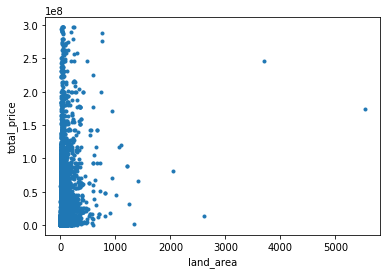

In [20]:
print( train[(train['land_area']>1000) ].land_area )
#太過於分散了，要drop欄位
#train = train.drop( labels = train[  (train['land_area']>1000) ].index, axis = 0 )
#sns.distplot(train.land_area)
plt.plot(train.land_area, train.total_price, '.' )
plt.xlabel('land_area')
plt.ylabel('total_price')

1351     3.269609e+05
8795     9.702438e+05
51731    3.837894e+05
55472    1.020404e+06
Name: parking_price, dtype: float64


Text(0,0.5,'total_price')

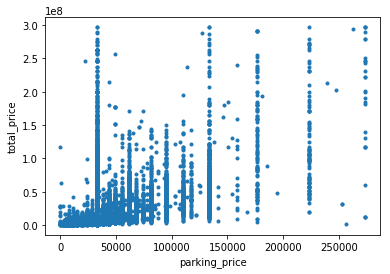

In [21]:
train['parking_price'] = train['parking_price'].fillna(train['parking_price'].mode()[0])
print( train[(train['parking_price']>300000) ].parking_price )
#df_all['parking_price'] = df_all['parking_price'].apply(int)
train = train.drop( labels = train[  (train['parking_price']>300000) ].index, axis = 0 )
#sns.distplot(train.parking_price)
plt.plot(train.parking_price, train.total_price, '.' )
plt.xlabel('parking_price')
plt.ylabel('total_price')

4339      90.209853
30232     61.822600
38617    967.370868
38992     83.497319
47253     84.609760
Name: parking_area, dtype: float64


Text(0,0.5,'total_price')

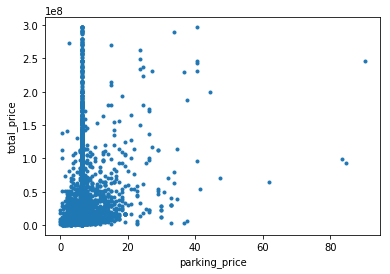

In [22]:
train['parking_area'] = train['parking_area'].fillna(train['parking_area'].mode()[0])
print( train[(train['parking_area']>50) ].parking_area )
train = train.drop( labels = train[  (train['parking_area']>800) ].index, axis = 0 )
#sns.distplot(train.parking_area)
plt.plot(train.parking_area, train.total_price, '.' )
plt.xlabel('parking_price')
plt.ylabel('total_price')

18748    566.505953
21231    693.750804
23605    913.610349
26014    693.750804
26767    589.808827
29104    913.610349
37526    715.297021
44963    718.903165
51410    416.941144
57691    418.845282
Name: building_area, dtype: float64


Text(0,0.5,'total_price')

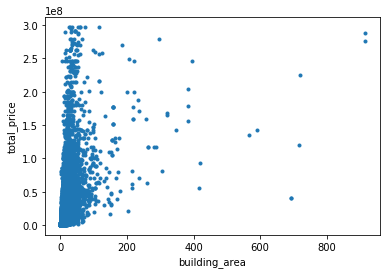

In [23]:
train['building_area'] = train['building_area'].fillna(train['building_area'].mode()[0])
print( train[(train['building_area']>400) ].building_area )
#train = train.drop( labels = train[  (train['building_area']>400) ].index, axis = 0 )
#sns.distplot(train.building_area)
plt.plot(train.building_area, train.total_price, '.' )
plt.xlabel('building_area')
plt.ylabel('total_price')

In [24]:
#train = train.drop([ 'parking_area'], axis=1, inplace=True)

In [25]:
#取得數值型態的欄位
#取得數值型態欄位
numeric_data = train._get_numeric_data()
numeric_data.columns

Index(['building_material', 'city', 'txn_dt', 'total_floor', 'building_type',
       'building_use', 'building_complete_dt', 'parking_way', 'parking_area',
       'parking_price',
       ...
       'XIV_500', 'XIV_index_500', 'XIV_1000', 'XIV_index_1000', 'XIV_5000',
       'XIV_index_5000', 'XIV_10000', 'XIV_index_10000', 'XIV_MIN',
       'total_price'],
      dtype='object', length=234)

## sketch pics


In [26]:
# drop掉每個欄位的NA值並劃出其分布
#for i in numeric_data:
#    temp = train[i].dropna()
#    print(f"there are {train[i].shape[0] - temp.shape[0]} NaN in {i}")
#    sns.distplot(temp) 
    #plt.show()

## Drop Null Feature(s)

In [27]:
#df_all = pd.concat( [ train.drop( [ 'Id', 'SalePrice' ], axis = 1 ),
#                      test.drop( [ 'Id' ], axis = 1 ) ],
#                      axis = 0, ignore_index = False )
df_all = pd.concat([train.drop('total_price', axis=1), test], keys=['train', 'test'])
trainID=df_all['building_id']
df_all.drop(['building_id'], axis=1, inplace=True)

In [28]:
# check null status
#print( df_all.shape )
#df_na = df_all.select_dtypes( exclude = [ 'object' ] ).isnull().sum()
#print( df_na[ df_na > 100 ].sort_values(ascending=False) )

In [29]:
# drop掉大多為Null的欄位
#df_all = df_all.drop(['parking_area'], axis = 1) # for 486 null values (train + test)
#print( df_all.shape )

In [30]:
# drop掉大多為Null的欄位
df_all = df_all.drop(['land_area'], axis = 1) #
print(df_all.shape)

(69842, 232)


In [31]:
df_all["parking_area"] = df_all["parking_area"].fillna(df_all['parking_area'].mode()[0])
df_all['parking_price'] = df_all['parking_price'].fillna(df_all['parking_price'].mode()[0])
df_all['txn_floor'] = df_all['txn_floor'].fillna(df_all['txn_floor'].mode()[0])    
df_all['village_income_median'] = df_all['village_income_median'].fillna(df_all['village_income_median'].mode()[0])
#df_all["parking_price"] = df_all.groupby("city")["parking_price"].transform(lambda x: x.fillna(x.mean()))
#df_all["txn_floor"] = df_all.groupby("city")["txn_floor"].transform(lambda x: x.fillna(x.mean()))


#df_all["LotFrontage"] = df_all.groupby("BldgType")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
#df_all['LotFrontage'] = df_all['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
#df_all['MasVnrArea'] = df_all['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
#df_all['BsmtFinSF1'] = df_all['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)

In [32]:
# Working with ordinal predictors
def QualToInt(x):
    if(x=='Ex'):
        r = 0
    elif(x=='Gd'):
        r = 1
    elif(x=='TA'):
        r = 2
    elif(x=='Fa'):
        r = 3
    elif(x=='missing'):
        r = 4
    else:
        r = 5
    return r

#df_all['ExterQual'] = df_all['ExterQual'].apply(QualToInt)

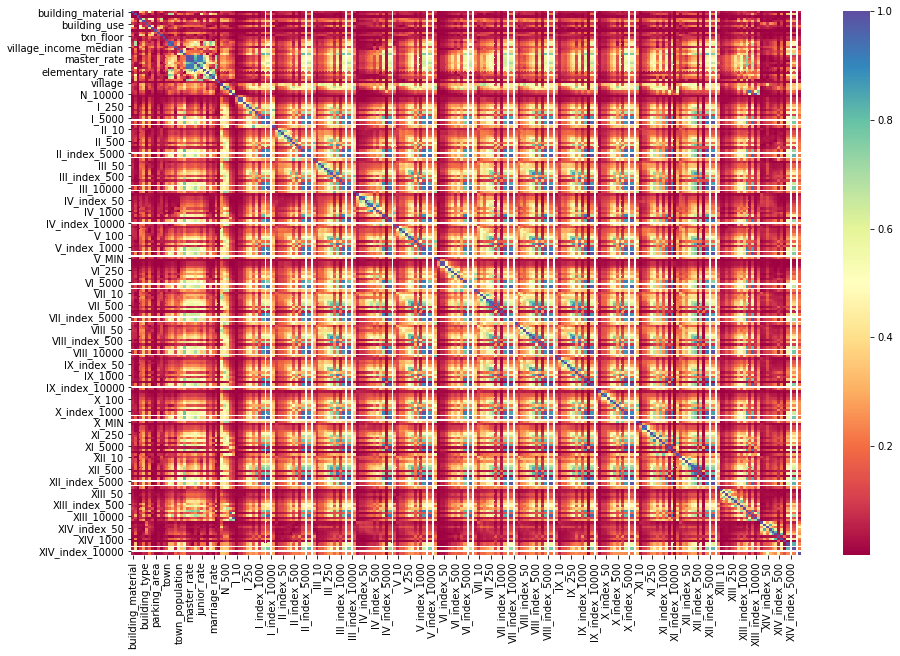

In [33]:
## Numerical to Categorical
# 嘗試不同的顏色"Spectral"：
corr_matrix=df_all.corr().abs()
plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix,cmap='Spectral')

## Numerical to Categorical

In [34]:
# df_train[['OverallCond', 'SalePrice']].groupby(['OverallCond']).agg({'SalePrice':'median', 'OverallCond':'count'}).sort_values(by='SalePrice', ascending=False)
#train[['MSSubClass', 'SalePrice']].groupby(['MSSubClass']).agg({'SalePrice':'median', 'MSSubClass':'count'}).sort_values(by='SalePrice', ascending=False)

In [35]:
# It helps to transform some numerical features to categorical
#df_all.YearBuilt = df_all.YearBuilt.astype ( str )

In [36]:
# handle skewness
train.total_price = np.log( train.total_price )
# exclude object型態的欄位
num_feats = df_all.select_dtypes( exclude = [ 'object' ] ).columns
# na drop should be done series by series
# apply function>>幫助我們算出偏差系數
skewed_feats = df_all[ num_feats ].apply( func = lambda s: skew(s.dropna()), axis = 0 )
print(skewed_feats)
# 選出dataframe大於0.75的人
skewed_feats = skewed_feats[ skewed_feats > 0.75 ].index
# print(skewed_feats)
# 把大於0.75的要作正規化，變成常態分配
# np.log1p是log(1+x), 若直接取log會有log0的問題
df_all[ skewed_feats ] = np.log1p( df_all[ skewed_feats ] )



building_material          -2.506154
city                        0.723041
txn_dt                     -0.158835
total_floor                 1.104377
building_type               0.116042
building_use                3.588161
building_complete_dt       -0.029503
parking_way                -1.450268
parking_area               24.405453
parking_price               5.508892
txn_floor                   1.808458
building_area              93.701945
town                        0.296150
lat                        -1.215272
lon                        -0.759728
village_income_median       2.853060
town_population             0.644780
town_area                   1.987137
town_population_density     0.769914
doc_rate                    1.502617
master_rate                 1.441976
bachelor_rate               1.226864
jobschool_rate             -0.015749
highschool_rate            -1.105088
junior_rate                -1.145332
elementary_rate             0.850556
born_rate                   0.473417
d

In [37]:
#df_all.describe(include = "O")

## One-Hot Encoding

In [38]:
df_all_dum = pd.get_dummies(df_all); df_all_dum.head()

building_material  city  txn_dt  total_floor  building_type  \
train 0                  8    21   18674     1.609438              3   
      1                  8     7   18800     1.791759              1   
      2                  8     7   19289     1.609438              1   
      3                  8    21   20385     3.218876              0   
      4                  1    21   20657     1.098612              4   

         building_use  building_complete_dt  parking_way  parking_area  \
train 0      1.098612                  6271            2      2.009889   
      1      1.098612                  7885            2      2.009889   
      2      1.098612                  6028            2      2.009889   
      3      1.098612                 18325            0      2.009889   
      4      1.098612                  6880            2      2.009889   

         parking_price    ...      XIV_250   XIV_500  XIV_index_500  XIV_1000  \
train 0      10.409924    ...     3.091042  4.077537              1  5.062595   
      1      10.409924    ...     2.079442  3.367296              1  4.753590   
      2      10.409924    ...     3.332205  4.369448              1  5.361292   
      3      11.303930    ...     1.098612  3.044522              1  4.836282   
      4      10.409924    ...     1.098612  2.944439              1  3.871201   

         XIV_index_1000  XIV_5000  XIV_index_5000  XIV_10000  XIV_index_10000  \
train 0               1  7.817625               1       6011                1   
      1               1  9.672375               1      32221                1   
      2               1  9.665294               1      32228                1   
      3               1  7.851272               1       7271                1   
      4               1  7.858641               1       7442                1   

          XIV_MIN  
train 0  3.568682  
      1  3.715365  
      2  4.015700  
      3  4.611440  
      4  4.829363  

[5 rows x 232 columns]

In [39]:
# 將NA的值填平均值
df_all_dum = df_all_dum.fillna( df_all_dum.mean() ); df_all_dum.head()

building_material  city  txn_dt  total_floor  building_type  \
train 0                  8    21   18674     1.609438              3   
      1                  8     7   18800     1.791759              1   
      2                  8     7   19289     1.609438              1   
      3                  8    21   20385     3.218876              0   
      4                  1    21   20657     1.098612              4   

         building_use  building_complete_dt  parking_way  parking_area  \
train 0      1.098612                  6271            2      2.009889   
      1      1.098612                  7885            2      2.009889   
      2      1.098612                  6028            2      2.009889   
      3      1.098612                 18325            0      2.009889   
      4      1.098612                  6880            2      2.009889   

         parking_price    ...      XIV_250   XIV_500  XIV_index_500  XIV_1000  \
train 0      10.409924    ...     3.091042  4.077537              1  5.062595   
      1      10.409924    ...     2.079442  3.367296              1  4.753590   
      2      10.409924    ...     3.332205  4.369448              1  5.361292   
      3      11.303930    ...     1.098612  3.044522              1  4.836282   
      4      10.409924    ...     1.098612  2.944439              1  3.871201   

         XIV_index_1000  XIV_5000  XIV_index_5000  XIV_10000  XIV_index_10000  \
train 0               1  7.817625               1       6011                1   
      1               1  9.672375               1      32221                1   
      2               1  9.665294               1      32228                1   
      3               1  7.851272               1       7271                1   
      4               1  7.858641               1       7442                1   

          XIV_MIN  
train 0  3.568682  
      1  3.715365  
      2  4.015700  
      3  4.611440  
      4  4.829363  

[5 rows x 232 columns]

In [40]:
#from sklearn.preprocessing import LabelEncoder
#cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
#        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
#        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
#        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
#for c in cols:
#    lbl = LabelEncoder() 
#    lbl.fit(list(df_all[c].values)) 
#    df_all[c] = lbl.transform(list(df_all[c].values))

# shape        
print('Shape all_data: {}'.format(df_all.shape))

Shape all_data: (69842, 232)


In [41]:
## Standardization

## Standardization

In [42]:
# normalization helps a bit
from sklearn import preprocessing

#num_feats = df_all_dum.select_dtypes( exclude = [ 'object' ] ).columns
df_all_dum[ num_feats ] = preprocessing.scale( df_all_dum[ num_feats ] )
df_all_dum[ num_feats ].head()

building_material      city    txn_dt  total_floor  building_type  \
train 0           0.337999  2.015612 -1.120773    -0.690272       0.671591   
      1           0.337999 -0.927462 -0.947614    -0.364954      -0.587255   
      2           0.337999 -0.927462 -0.275592    -0.690272      -0.587255   
      3           0.337999  2.015612  1.230616     2.181465      -1.216678   
      4          -2.885364  2.015612  1.604419    -1.601743       1.301014   

         building_use  building_complete_dt  parking_way  parking_area  \
train 0     -0.168208             -1.100642     0.529982      0.059588   
      1     -0.168208             -0.728309     0.529982      0.059588   
      2     -0.168208             -1.156699     0.529982      0.059588   
      3     -0.168208              1.680087    -2.042739      0.059588   
      4     -0.168208             -0.960152     0.529982      0.059588   

         parking_price    ...      XIV_250   XIV_500  XIV_index_500  XIV_1000  \
train 0      -0.079928    ...     0.873990  0.468302       0.065571 -0.009769   
      1      -0.079928    ...    -0.139278 -0.253298       0.065571 -0.338334   
      2      -0.079928    ...     1.115550  0.764881       0.065571  0.307836   
      3       2.121522    ...    -1.121725 -0.581234       0.065571 -0.250408   
      4      -0.079928    ...    -1.121725 -0.682918       0.065571 -1.276578   

         XIV_index_1000  XIV_5000  XIV_index_5000  XIV_10000  XIV_index_10000  \
train 0        0.011967 -0.622073             0.0  -1.160310              0.0   
      1        0.011967  1.773411             0.0   1.753319              0.0   
      2        0.011967  1.764265             0.0   1.754097              0.0   
      3        0.011967 -0.578617             0.0  -1.020242              0.0   
      4        0.011967 -0.569100             0.0  -1.001233              0.0   

          XIV_MIN  
train 0 -0.868259  
      1 -0.700027  
      2 -0.355571  
      3  0.327690  
      4  0.577627  

[5 rows x 232 columns]

In [43]:
np.any(np.isnan(df_all_dum))
df_all_dum.columns[df_all_dum.isna().any()].tolist()

[]

In [44]:
# 查詢是否有重複的欄位
df_all_dum.columns[df_all_dum.columns.duplicated()]

Index([], dtype='object')

## Training Start

In [45]:
# inputs
from sklearn.model_selection import train_test_split
from matplotlib import rcParams
X = df_all_dum[:train.shape[0]]
y = train.total_price
#把train data與test分開
X, X_val, y, y_val = train_test_split(X, y, test_size = 0.1, random_state = 40)

X_test = df_all_dum[ train.shape[0]: ]

In [46]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv = 5))
    return(rmse)

## XGBoost

In [47]:
import xgboost as xgb
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

In [ ]:
#https://www.kaggle.com/pablocastilla/predict-house-prices-with-xgboost-regression
#model_XGB = XGBRegressor(colsample_bytree=0.4,
#                 gamma=0,                 
#                 learning_rate=0.07,
#                 max_depth=3,
#                 min_child_weight=1.5,
#                 n_estimators=10000,                                                                    
#                 reg_alpha=0.75,
#                 reg_lambda=0.45,
#                 subsample=0.6,
#                 seed=42) 

model_XGB = XGBRegressor(base_score=0.5,colsample_bytree=0.7, gamma=0.0468, 
                             learning_rate=0.01, max_depth=3, 
                             min_child_weight=1, n_estimators=10000,objective='reg:linear',
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_XGB.fit(X, y)
y_pred = model_XGB.predict( X )
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('  R2:', metrics.r2_score(y, y_pred))

val_preds = model_XGB.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

In [ ]:
y_answer_XGB = model_XGB.predict( X_test )
y_answer_XGB = np.exp(y_answer_XGB)
print(pd.DataFrame({'total_price': y_answer_XGB}, index=test.building_id).head())
pd.DataFrame({'total_price': y_answer_XGB}, index=test.building_id).to_csv('submission_xgb_0514_3Level.csv')

In [ ]:
def error(yhat,y_pred):
    yhat = np.array(yhat)
    y_pred = np.array(y_pred)
    error_sum = ((yhat - y_pred)**1).sum()
    print(error_sum)
    return error_sum

In [ ]:
print(error(y,y_pred))

In [ ]:
import pickle
#save model
pickle.dump(model_XGB, open("./savemodel/xgb_0513_N1.dat", "wb"))

In [ ]:
#model_XGB = XGBRegressor(base_score=0.5,colsample_bytree=0.7, gamma=0.0468, 
#                             learning_rate=0.01, max_depth=3, 
#                             min_child_weight=1, n_estimators=10000,objective='reg:linear',
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                             random_state =7, nthread = -1)

#https://github.com/Cuongvn08/tensorflow_kaggle_house_price/blob/master/train.py
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1)
#import lightgbm as lgb
#model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                              learning_rate=0.05, n_estimators=720,
#                              max_bin = 55, bagging_fraction = 0.8,
#                              bagging_freq = 5, feature_fraction = 0.2319,
#                              feature_fraction_seed=9, bagging_seed=9,
#                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

#model_XGB = XGBRegressor(base_score=0.5,colsample_bytree=0.7, gamma=0.0468, 
#                             learning_rate=0.01, max_depth=6, 
#                             min_child_weight=5, n_estimators=4000,objective='reg:linear',
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                             random_state =7, nthread = -1)

#model_XGB = XGBRegressor(base_score=0.5,colsample_bytree=0.7, gamma=0.0468, 
#                             learning_rate=0.01, max_depth=7, 
#                             min_child_weight=4, n_estimators=5000,objective='reg:linear',
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                             random_state =7, nthread = -1)
#colsample_bytree=0.4603, gamma=0.0468, 
#                             learning_rate=0.1, max_depth=7, 
#                             min_child_weight=1.7817, n_estimators=2200,
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                             random_state =7, nthread = -1


#colsample_bylevel=1,colsample_bytree=1, gamma=0, 
#                             learning_rate=0.1, max_delta_step=0,max_depth=7, 
#                             min_child_weight=1,missing=None, n_estimators=2200,nthread=-1,objective='reg:linear',
#                             reg_alpha=0, reg_lambda=1,scale_pos_weight=1,seed=1850,
#                              silent=True,subsample=1,
#                             random_state =7
#model_XGB = XGBRegressor()
model_XGB.fit(X, y)
y_pred = model_XGB.predict( X )
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('  R2:', metrics.r2_score(y, y_pred))

In [ ]:
val_preds = model_XGB.predict(X_val)

print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )


In [ ]:
y_answer_XGB = model_XGB.predict( X_test )
y_answer_XGB = np.exp(y_answer_XGB)
print(pd.DataFrame({'total_price': y_answer_XGB}, index=test.building_id).head())

In [ ]:
pd.DataFrame({'total_price': y_answer_XGB}, index=test.building_id).to_csv('submission_xgb_0513_2200.csv')

In [ ]:
import pickle
#save model
pickle.dump(model_XGB, open("./savemodel/submission_xgb_0513_2200.dat", "wb"))

In [ ]:
from sklearn.linear_model import LassoCV
model_Lasso = LassoCV( alphas = [ 1, 0.1, 0.01, 0.001, 0.0005, 0.0004, 0.0003, 0.0002 ],
                       max_iter = 2000 ).fit( X, y )
print( rmse_cv( model_Lasso ), model_Lasso.alpha_ )

In [ ]:
coef = pd.Series( model_Lasso.coef_, index = X.columns )
print( sum(coef != 0), sum(coef == 0))

In [ ]:
important_coef = pd.concat( [coef.sort_values().head(10), coef.sort_values().tail(10)] )
rcParams['figure.figsize'] = (8.0, 10.0)
important_coef.plot(kind = 'barh')
plt.title('Coefficients in Model Lasso')

In [ ]:

preds = model_Lasso.predict(X)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, preds)))
print('  R2:', metrics.r2_score( y, preds ) )

In [ ]:
val_preds = model_Lasso.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

In [ ]:
y_answer_Lasso = model_Lasso.predict( X_test )
y_answer_Lasso = np.exp(y_answer_Lasso)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'total_price': y_answer_Lasso}, index=test.building_id).head())

In [ ]:
pd.DataFrame({'total_price': y_answer_Lasso}, index=test.building_id).to_csv('submission_0513_Lasso.csv')

In [ ]:
import pickle
#save model
pickle.dump(model_Lasso, open("./savemodel/submission_0513_Lasso.dat", "wb"))

In [ ]:
# Lasso + XGB
y_answer = y_answer_Lasso * 0.75 + y_answer_XGB * 0.25
print(pd.DataFrame({'total_price': y_answer}, index=test.building_id).head())

print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )
pd.DataFrame({'total_price': y_answer}, index=test.building_id).to_csv('submission_LX.csv')

In [ ]:
#LassoCV

In [ ]:

kf = KFold(n_splits = 5, random_state = None, shuffle = True)
pred_tmp = np.zeros((X_test.shape[0],1)).reshape(-1)
# print(list(kf.split(X)))
for train_index, val_index in kf.split(X):
#     print('train_index:', train_index)
#     print('val_index:', val_index)
    X_train = pd.DataFrame(data = X.values[train_index], columns = X.columns, index = train_index)
    X_val = pd.DataFrame(data = X.values[val_index], columns = X.columns, index = val_index)
#     y_train = pd.DataFrame(data = y.values[train_index], columns = ['SalePrice_N'], index = train_index)
    y_train = y.values[ train_index ]
    y_val = pd.DataFrame(data = y.values[val_index], columns = ['SalePrice'], index = val_index)
    model_XGB = XGBRegressor()
#    model_XGB = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                             learning_rate=0.1, max_depth=5, 
#                             min_child_weight=1.7817, n_estimators=2200,
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                             random_state =7, nthread = -1)
    model_XGB.fit(X_train, y_train)
    y_pred = model_XGB.predict(X_val)
    y_ans = model_XGB.predict(X_test)
#     print(y_ans.shape)
    pred_tmp+=np.exp(y_ans)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
    print('  R2:', metrics.r2_score(y_val, y_pred))
y_answer_XGB = pred_tmp/5

## Decision Tree

In [173]:
#https://www.itread01.com/content/1545151168.html

In [174]:
from sklearn.model_selection import GridSearchCV
xgb1 = XGBRegressor()
#parameters={'colsample_bytree':[0.4603], 'gamma':[0.0468], 
#                             'learning_rate':[0.1,0.05,0.01], 'max_depth':[6,7,8], 
#                             'min_child_weight':[4], 'n_estimators':[2200],
#                             'reg_alpha':[0.4640], 'reg_lambda':[0.8571],
#                             'subsample:':[0.5213], 'silent':[1],
#                             'random_state' :[7], 'nthread' : [-1]}

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.01], #so called `eta` value
              'max_depth': [7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

#xgb_grid = GridSearchCV(xgb1,
#                        parameters,
#                        cv = 2,
#                        n_jobs = 5,
#                        verbose=True)

#xgb_grid.fit(X,y)

#print(xgb_grid.best_score_)
#print(xgb_grid.best_params_)

In [175]:
#val_preds = xgb_grid.predict(X_val)

#print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
#print('  R2:', metrics.r2_score( y_val, val_preds ) )

In [176]:
#y_answer_XGB = xgb_grid.predict( X_test )
#y_answer_XGB = np.exp(y_answer_XGB)
#print(pd.DataFrame({'SalePrice': y_answer_XGB}, index=test.Id).head())

In [177]:
#pd.DataFrame({'SalePrice': y_answer_XGB}, index=test.Id).to_csv('submission_xgb.csv')

## SVR

In [94]:
# KFold Data Split

from sklearn.svm import SVR
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state = None, shuffle = False)
pred_tmp = np.zeros((X_test.shape[0],1)).reshape(-1)
for train_index, val_index in kf.split(X):
    X_train = pd.DataFrame(data = X.values[train_index], columns = X.columns, index = train_index)
    X_val = pd.DataFrame(data = X.values[val_index], columns = X.columns, index = val_index)
#     y_train = pd.DataFrame(data = y.values[train_index], columns = ['SalePrice'], index = train_index)
    y_train = y.values[ train_index ]
    y_val = pd.DataFrame(data = y.values[val_index], columns = ['total_price'], index = val_index)
    print(train_index)
    model_SVR = SVR(kernel='rbf', gamma=0.002)
    model_SVR.fit(X_train, y_train)
    print('predict')
    y_pred = model_SVR.predict(X_val)
    y_ans = model_SVR.predict(X_test)
    pred_tmp+=np.exp(y_ans)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
    print('  R2:', metrics.r2_score(y_val, y_pred))
y_answer_SVR = pred_tmp/5

[10786 10787 10788 ... 53925 53926 53927]
predict
RMSE: 0.2788542224952493
  R2: 0.9415712301395708
[    0     1     2 ... 53925 53926 53927]


KeyboardInterrupt: 

In [ ]:
model_SVR = SVR(kernel='rbf', gamma=0.002)
model_SVR.fit(X, y)
y_answer_SVR = model_SVR.predict( X_test )
y_answer_SVR = np.exp(y_answer_SVR)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'total_price': y_answer_SVR}, index=test.building_id).head())

In [ ]:
pd.DataFrame({'total_price': y_answer_SVR}, index=test.building_id).to_csv('submission_SVR.csv')

## LassoCV

In [ ]:
from sklearn.linear_model import LassoCV
model_Lasso = LassoCV( alphas = [ 1, 0.1, 0.01, 0.001, 0.0005, 0.0004, 0.0003, 0.0002 ],
                       max_iter = 2000 ).fit( X, y )
print( rmse_cv( model_Lasso ), model_Lasso.alpha_ )

In [ ]:
coef = pd.Series( model_Lasso.coef_, index = X.columns )
print( sum(coef != 0), sum(coef == 0))

In [ ]:
important_coef = pd.concat( [coef.sort_values().head(10), coef.sort_values().tail(10)] )
rcParams['figure.figsize'] = (8.0, 10.0)
important_coef.plot(kind = 'barh')
plt.title('Coefficients in Model Lasso')

In [ ]:

preds = model_Lasso.predict(X)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, preds)))
print('  R2:', metrics.r2_score( y, preds ) )

In [ ]:
val_preds = model_Lasso.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

In [ ]:
y_answer_Lasso = model_Lasso.predict( X_test )
y_answer_Lasso = np.exp(y_answer_Lasso)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'total_price': y_answer_Lasso}, index=test.building_id).head())

In [ ]:
pd.DataFrame({'total_price': y_answer_Lasso}, index=test.building_id).to_csv('submission_Lasso_drop.csv')

In [179]:
y_pred = model_SVR.predict(X)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('  R2:', metrics.r2_score(y, y_pred))

RMSE: 0.10138901729916881
  R2: 0.934380883634592


In [180]:
val_preds = model_SVR.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

RMSE: 0.11178810224904052
  R2: 0.9232328827938405


In [181]:
model_SVR = SVR(kernel='rbf', gamma=0.002)
model_SVR.fit(X, y)
y_answer_SVR = model_SVR.predict( X_test )
y_answer_SVR = np.exp(y_answer_SVR)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'SalePrice': y_answer_SVR}, index=test.Id).head())

          SalePrice
Id                 
1461  119564.485424
1462  156653.579860
1463  171243.151646
1464  190406.991972
1465  193886.623344


In [182]:
pd.DataFrame({'SalePrice': y_answer_SVR}, index=test.Id).to_csv('submission_SVR.csv')

In [185]:
#RandomForestClassifier 效果不好
clf = RandomForestClassifier()
clf.fit(X, y.astype('int'))
y_pred = clf.predict(X)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('  R2:', metrics.r2_score(y, y_pred))

RMSE: 0.6077254179680507
  R2: -1.357563246168168


In [186]:
val_preds = clf.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

RMSE: 0.6026382665096865
  R2: -1.2309892387712504


In [187]:

y_answer_rm = clf.predict( X_test )
y_answer_rm = np.exp(y_answer_rm)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'SalePrice': y_answer_rm}, index=test.Id).head())

          SalePrice
Id                 
1461   59874.141715
1462   59874.141715
1463  162754.791419
1464  162754.791419
1465  162754.791419


## Blending

In [96]:
# Lasso + SVR
y_answer = y_answer_Lasso * 0.75 + y_answer_SVR * 0.25
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )
pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_LS_Best.csv')

          SalePrice
Id                 
1461  116306.877254
1462  156581.025459
1463  176170.412685
1464  191485.161847
1465  195519.510106
RMSE: 0.11178810224904052
  R2: 0.9232328827938405


In [97]:
# Lasso + XGB
y_answer = y_answer_Lasso * 0.75 + y_answer_XGB * 0.25
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())

print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )
pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_LX.csv')

          SalePrice
Id                 
1461  116870.775429
1462  158092.478150
1463  177635.847430
1464  190654.937292
1465  196155.229270
RMSE: 0.11178810224904052
  R2: 0.9232328827938405


In [98]:
# Lasso + SVR + XGB
y_answer = y_answer_Lasso * 0.72 + y_answer_SVR * 0.04 + y_answer_XGB * 0.24
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
#print('  R2:', metrics.r2_score( y_answer, val_preds ) )
pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_LSX.csv')

          SalePrice
Id                 
1461  116978.523439
1462  158034.920031
1463  177380.137723
1464  190645.017135
1465  196064.483158
RMSE: 0.11178810224904052


In [99]:
# Lasso + SVR + XGB -2
y_answer = (y_answer_Lasso + y_answer_SVR + y_answer_XGB) /3
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())
pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_LSX3.csv')

          SalePrice
Id                 
1461  118868.523805
1462  158636.603715
1463  175386.958434
1464  189779.212509
1465  195459.976346


In [100]:
# SVR + XGB
y_answer = y_answer_SVR * 0.3 + y_answer_XGB * 0.7
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())

pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_SX.csv')

          SalePrice
Id                 
1461  121143.400315
1462  160885.644271
1463  175346.367369
1464  188082.363217
1465  195666.627628
